# Куличенко Владимир
# БПМ172

## Задача Дирихле для уравнения Пуассона


### Условия

Решить задачу Дирихле для уравнения Пуассона 

$$ \Delta u = 4, x_{i}\in[0,1], i = 1, 2 $$

$$ u|_{x_{1}=0} = x_{2}^{2} $$
$$ u|_{x_{1}=1} = 1+x_{2}^{2} $$

$$ u|_{x_{2}=0} = x_{1}^{2} $$
$$ u|_{x_{2}=1} = 1+x_{1}^{2} $$

c помощью методов: а) методом Зейделя б) методом Фурье 

#### Точное решение

$$ u(x_{1}, x_{2}) = x_{1}^{2} +  x_{2}^{2} $$

In [1]:
import numpy as np
from matplotlib import pyplot  as plt

Задаем начальные условия

In [2]:
a = 0
b = 1
h = 0.01
f = 4

x1 = np.arange(a,b+h,h)
x2 = np.arange(a,b+h,h)

size = len(x1)

u = np.zeros((size, size))

u[0,:] = x1**2
u[-1,:] = 1 + x1**2
u[:,0] = x2**2
u[:,-1] = 1 + x2**2

Найдем точные значения

In [3]:
u_true_f = lambda x1,x2: x1**2 + x2**2

x1_grid, x2_grid = np.meshgrid(x1,x2)

u_true = u_true_f(x1_grid, x2_grid)

### Метод Зейделя

Схема нахождения решения (при $h_1 = h_2 = h$)

$$ u_{ij}^k = 0.25 \cdot (u_{i, j-1}^{k} + u_{i, j+1}^{k} + u_{i-1, j}^{k} + u_{i+1, j}^{k} - h^2 \cdot f(i,j)) $$

In [10]:
# Количество возможных итераций
iteration_number = 0
max_number_iter = 1000
# Ошибка между итерациями к которой будем стремиться
error = 1e-7

err_difference = error + 1

while (err_difference > error) and (iteration_number < max_number_iter):
    u_latest = u.copy()
    for i in range(1,size-1):
        for j in range(1,size-1):
            u[i,j] = 0.25 * (u[i,j-1] + u[i,j+1] + u[i-1,j] + u[i+1,j] - h**2 * f)
    err_difference = abs(u-u_latest).mean()
    iteration_number += 1
u = u.T

#### Сравним решения на графиках

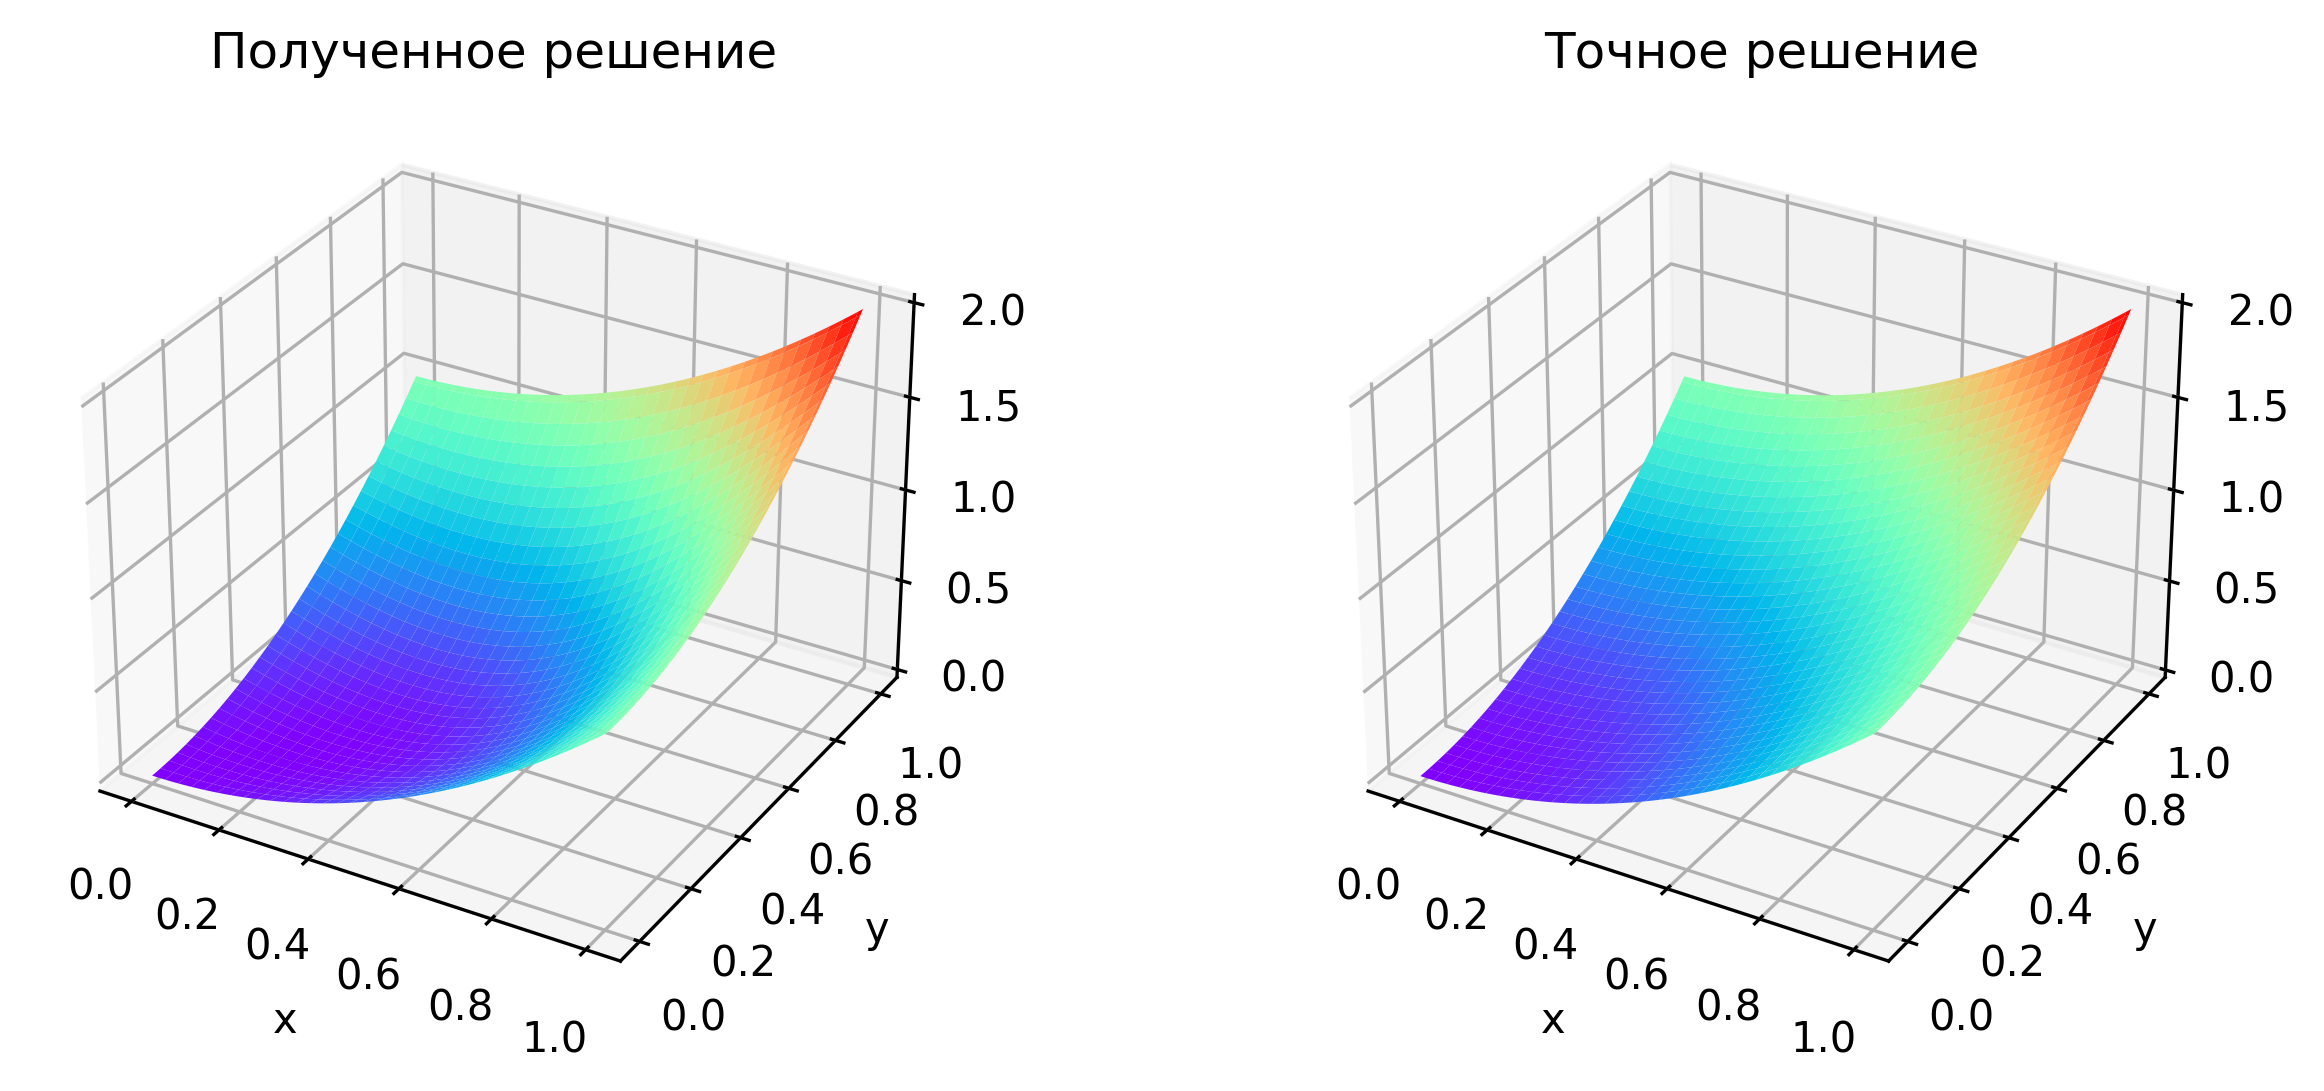

In [11]:
fig = plt.figure(figsize=(10,9),dpi=300)

ax = fig.add_subplot(221, projection='3d')
ax.plot_surface(x1_grid, x2_grid, u, cmap='rainbow')
plt.title('Полученное решение')
plt.xlabel('x')
plt.ylabel('y')

ax = fig.add_subplot(222, projection='3d')
ax.plot_surface(x1_grid, x2_grid, u_true, cmap='rainbow')
plt.title('Точное решение')
plt.xlabel('x')
plt.ylabel('y')

plt.show()